In [ ]:
# Importing the "warnings" module and sets a filter to ignore FutureWarnings. The action is set to 'ignore'
import warnings
warnings.filterwarnings(action='ignore') #, category=FutureWarning

In [ ]:
# Importing Pandas Modules
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix #Functions for evaluating the performance of machine learning models
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
from google.colab import drive
import matplotlib.pyplot as plt #For creating visualizations in Python
#!pip install scikit-learn==1.0.1

In [ ]:
#mount the Google Drive to the Colaboratory runtime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Acquisition and Preprocessing**

In [ ]:
#Reading the features file
df_events=pd.read_csv("/content/drive/MyDrive/Stat Stars/Stat Stars New/Copy of features.csv")

In [ ]:
df_events

,game_id,action_id,type_id_a0,type_id_a1,type_id_a2,bodypart_id_a0,bodypart_id_a1,bodypart_id_a2,result_id_a1,result_id_a2,...,speed_a02,shot_angle_a0,shot_angle_a1,shot_angle_a2,caley_zone_a0,caley_zone_a1,caley_zone_a2,angle_zone_a0,angle_zone_a1,angle_zone_a2
0,2500098,17,shot,dribble,cross,foot,foot,foot,success,success,...,1.319750,0.499778,0.483780,0.065500,2,3,8,9,12,18
1,2500098,40,shot,corner_crossed,pass,foot,foot,foot,success,fail,...,4.249364,0.517985,0.000000,0.363334,3,8,4,12,21,12
2,2500098,77,shot,clearance,cross,foot,foot,foot,fail,fail,...,5.874066,0.242481,0.491555,0.043863,6,3,0,18,12,18
3,2500098,140,shot,cross,dribble,foot,foot,foot,success,success,...,2.061543,0.371538,0.134860,0.167545,4,5,0,12,15,18
4,2500098,145,shot,pass,pass,foot,foot,foot,success,success,...,1.289870,0.978291,0.654611,0.320841,1,3,4,6,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43035,2500686,988,shot,pass,pass,foot,foot,foot,success,success,...,1.941240,0.390287,0.250750,0.432643,3,6,3,12,18,12
43036,2500686,1105,shot,pass,pass,foot,foot,foot,success,success,...,3.378767,0.328091,0.289614,0.117975,6,6,8,15,15,18
43037,2500686,1108,shot,pass,keeper_save,foot,foot,other,success,success,...,4.032902,0.236780,0.087433,3.141593,6,0,1,18,21,0
43038,2500686,1166,shot,dribble,take_on,foot,foot,foot,success,success,...,7.556634,0.495060,0.287572,0.288580,3,6,6,12,15,15


In [ ]:
#Dropping unwanted columns from the Dataset
df_events.drop(['game_id','action_id'],axis='columns', inplace=True)

In [ ]:
#Reading the Labels file
df_results =pd.read_csv("/content/drive/MyDrive/Stat Stars/Stat Stars New/Copy of labels.csv")

In [ ]:
df_results

,game_id,action_id,goal
0,2500098,17,False
1,2500098,40,False
2,2500098,77,False
3,2500098,140,False
4,2500098,145,False
...,...,...,...
43035,2500686,988,False
43036,2500686,1105,False
43037,2500686,1108,False
43038,2500686,1166,False


In [ ]:
# To see the Imbalance in the Label Dataset of Goal and No Goal
# Get the count of each unique value in the 'goal' column
goal_counts = df_results['goal'].value_counts()

# Print the goal counts and percentage
total_samples = goal_counts.sum()
print(goal_counts)
print("Initially there is a class imbalance with goal- {:.1f}% and no goal- {:.1f}%".format(goal_counts[1]/total_samples*100, goal_counts[0]/total_samples*100))
print("Goal: {} ({:.2f}%)".format(goal_counts[1], (goal_counts[1]/goal_counts.sum())*100)) #percentage of samples that have the goal label.
print("No goal: {} ({:.2f}%)".format(goal_counts[0], (goal_counts[0]/goal_counts.sum())*100)) #percentage of samples that have the No goal label.

False    38250
True      4790
Name: goal, dtype: int64
Initially there is a class imbalance with goal- 11.1% and no goal- 88.9%
Goal: 4790 (11.13%)
No goal: 38250 (88.87%)


# **One Hot Encoding (Making dummies for Categorical variables)**
One hot encoding or making dummies for categorical variables is a technique used to convert categorical variables into a numerical format that can be easily understood by machine learning models.

In [ ]:
# 3 New Dataframes for storing data
#The first new dataframe df_events1s contains columns related to the first player involved in the event
#The second new dataframe df_events2s contains columns related to both players involved in the event
#The third new dataframe df_events3s is simply a copy of the original dataframe
#Finally, the code creates a fourth new dataframe df_basic by selecting a subset of columns from the df_events1s dataframe
df_events1s = df_events[['type_id_a0','bodypart_id_a0','start_x_a0', 'start_y_a0',\
                         'start_dist_to_goal_a0', 'start_angle_to_goal_a0',\
                         'shot_angle_a0','caley_zone_a0','angle_zone_a0']].copy()
df_events2s = df_events[['type_id_a0', 'type_id_a1','bodypart_id_a0','bodypart_id_a1','result_id_a1',\
                         'start_x_a0', 'start_y_a0', 'start_x_a1', 'start_y_a1','end_x_a1', 'end_y_a1',\
                         'dx_a1','dy_a1', 'movement_a1', 'dx_a01','dy_a01', 'mov_a01',\
                         'start_dist_to_goal_a0', 'start_angle_to_goal_a0',\
                         'start_dist_to_goal_a1', 'start_angle_to_goal_a1',\
                         'end_dist_to_goal_a1', 'end_angle_to_goal_a1',\
                         'team_1',  'time_delta_1',\
                         'speedx_a01', 'speedy_a01', 'speed_a01',  'shot_angle_a0', 'shot_angle_a1',\
                         'caley_zone_a0', 'caley_zone_a1','angle_zone_a0', 'angle_zone_a1']].copy()
df_events3s = df_events.copy()
df_basic = df_events1s[['type_id_a0','bodypart_id_a0','start_x_a0', 'start_y_a0',\
                         'start_dist_to_goal_a0','shot_angle_a0']].copy()

Based on the new dataframes created, we are trying to extract features that might be useful in predicting whether a shot in an event results in a goal or not. The features extracted include the type of event, the body part used in the shot, the location of the shot, the distance and angle to the goal at the start of the shot, and the shot angle.

By extracting these features and encoding them using one-hot encoding, we are preparing the data for a machine learning model that can learn to predict the outcome of a shot based on these features.**This could potentially be useful in analyzing and improving a team's performance by identifying factors that contribute to successful shots and goals.**

**In the below Python Code**: 'create_dummies' function is using one hot encoding to convert categorical variables into binary features. 
'data' as input and an optional argument 'nshots' which specifies the number of shots in the data. 
The function checks the value of nshots and creates binary features for categorical variables in the 'data' based on the specified number of shots. 

*   If **nshots=0**, it creates binary features for type_id_a0 and bodypart_id_a0. 
*   If **nshots=1**, it creates binary features for caley_zone_a0, angle_zone_a0, type_id_a1, bodypart_id_a1, and result_id_a1.
*   If **nshots=2**, it creates binary features for caley_zone_a2, angle_zone_a2, type_id_a2, bodypart_id_a2, and result_id_a2.

The function then joins the binary features to the data DataFrame, drops the original categorical variables, and returns the modified DataFrame with binary features as new columns.

In [ ]:
def create_dummies(data,nshots=0):
    if (nshots>=0):
        data_dummies = pd.get_dummies(data.type_id_a0,prefix="type_id_a0")
        data = data.join(data_dummies)
        data=data.drop(columns=["type_id_a0"])
        data_dummies = pd.get_dummies(data.bodypart_id_a0,prefix="bodypart_id_a0")  
        data = data.join(data_dummies)
        data=data.drop(columns=["bodypart_id_a0"]) 
    if (nshots>=1):
        data_dummies = pd.get_dummies(data.caley_zone_a0,prefix="caley_zone_a0") 
        data = data.join(data_dummies)
        data=data.drop(columns=["caley_zone_a0"]) 
        data_dummies = pd.get_dummies(data.angle_zone_a0,prefix="angle_zone_a0") 
        data = data.join(data_dummies)
        data=data.drop(columns=["angle_zone_a0"]) 
    if (nshots>=2):
        data_dummies = pd.get_dummies(data.type_id_a1,prefix="type_id_a1")
        data = data.join(data_dummies)
        data=data.drop(columns=["type_id_a1"]) 
        data_dummies = pd.get_dummies(data.bodypart_id_a1,prefix="bodypart_id_a1") 
        data = data.join(data_dummies)
        data=data.drop(columns=["bodypart_id_a1"]) 
        data_dummies = pd.get_dummies(data.caley_zone_a1,prefix="caley_zone_a1") 
        data = data.join(data_dummies)
        data=data.drop(columns=["caley_zone_a1"]) 
        data_dummies = pd.get_dummies(data.angle_zone_a1,prefix="angle_zone_a1") 
        data = data.join(data_dummies)
        data=data.drop(columns=["angle_zone_a1"]) 
        data_dummies = pd.get_dummies(data.result_id_a1,prefix="result_id_a1") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["result_id_a1"]) 
        data=data.drop(columns=["result_id_a1_fail"])
        data_dummies = pd.get_dummies(data.team_1,prefix="team_1") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["team_1"])
        data_dummies = pd.get_dummies(data.team_2,prefix="team_2") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["team_2"])
        data=data.drop(columns=["team_1_False"])
        data=data.drop(columns=["team_2_False"])

    if (nshots==3):
        data_dummies = pd.get_dummies(data.type_id_a2,prefix="type_id_a2")
        data = data.join(data_dummies)
        data=data.drop(columns=["type_id_a2"])
        data_dummies = pd.get_dummies(data.bodypart_id_a2,prefix="bodypart_id_a2") 
        data = data.join(data_dummies)
        data=data.drop(columns=["bodypart_id_a2"]) 
        data_dummies = pd.get_dummies(data.caley_zone_a2,prefix="caley_zone_a2") 
        data = data.join(data_dummies)
        data=data.drop(columns=["caley_zone_a2"]) 
        data_dummies = pd.get_dummies(data.angle_zone_a2,prefix="angle_zone_a2") 
        data = data.join(data_dummies)
        data=data.drop(columns=["angle_zone_a2"]) 
        data_dummies = pd.get_dummies(data.result_id_a2,prefix="result_id_a2") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["result_id_a2"])     
    return data

This code defines a function called "create_dummies" that creates dummy variables from categorical variables in a dataset. The function takes two parameters: "data", a pandas dataframe, and "nshots", which is an integer that determines how many sets of dummy variables will be created.

The function first checks if "nshots" is greater than or equal to 0. If it is, it creates dummy variables for the "type_id_a0" and "bodypart_id_a0" columns in the "data" dataframe using the "pd.get_dummies()" function, which creates dummy variables from categorical variables. The prefix "type_id_a0" or "bodypart_id_a0" is added to the column names of the resulting dummy variables. The function then joins these new dummy variables to the "data" dataframe and drops the original "type_id_a0" and "bodypart_id_a0" columns.

If "nshots" is greater than or equal to 1, the function creates dummy variables for the "caley_zone_a0", "angle_zone_a0", "type_id_a1", "bodypart_id_a1", "caley_zone_a1", "angle_zone_a1", "result_id_a1", "team_1", and "team_2" columns in the same way as above. The "result_id_a1" column has a specific meaning for different types of shots: 1- open play, 2- set piece, 3- corner, 4- free kick.

If "nshots" is exactly 3, the function creates dummy variables for the "type_id_a2", "bodypart_id_a2", "caley_zone_a2", "angle_zone_a2", and "result_id_a2" columns in the same way as above.

Finally, the function returns the modified "data" dataframe with the new dummy variables added.

In [ ]:
#df_events_2
df_events_2=df_events
df_events_2=create_dummies(df_events_2,nshots=3)

In [ ]:
num_columns = df_events_2.shape[1]

print("Number of columns:", num_columns)
#print(df_events_2.columns)

Number of columns: 149


Both above set of codes are performing one-hot encoding. The First code defines a function called create_dummies that takes in a dataframe data and performs one-hot encoding on some of its categorical columns based on the value of the nshots parameter. The second code is simply applying the create_dummies function on a dataframe called df_events_2, which creates new columns of binary values (1's and 0's) for each unique value of the categorical columns.

# **Random Undersampling with IMBLearn**
* Random under-sampling is a technique used in machine learning to deal with imbalanced datasets. Imbalanced datasets are datasets where the number of instances in one class is much higher than the other class. This can lead to biased results when training a machine learning model.
* Random under-sampling involves reducing the number of instances in the majority class by randomly selecting a subset of instances equal to the number of instances in the minority class. This can be done using the imblearn library in Python.

In [ ]:
!pip install -U scikit-learn
from imblearn.under_sampling import RandomUnderSampler
y = df_results['goal']
rus = RandomUnderSampler(random_state=42, replacement=True, sampling_strategy=0.2395) #Initializes a RandomUnderSampler object called "rus"
x_rus, y_rus = rus.fit_resample(df_events_2, y)# fit predictor and target variable
print('original dataset shape:', y.shape)
print('Resample dataset shape', y_rus.shape)
print(pd.Series(y_rus).value_counts())
#The resulting undersampled predictor and target variables are stored in x_rus and y_rus, respectively.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
original dataset shape: (43040,)
Resample dataset shape (24790,)
False    20000
True      4790
Name: goal, dtype: int64


## **Synthetic Minority Oversampling Technique (SMOTE)**

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.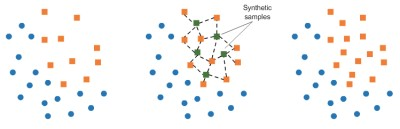

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5) #Indicates that the minority class is oversampled to achieve a ratio of 0.5 between the majority and minority classes.
#Fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_rus, y_rus)#fit_resample()-fit the predictor and target variables, x_rus and y_rus respectively. 
print('Original dataset shape', y_rus.shape)
print('Resample dataset shape', y_smote.shape)
print(pd.Series(y_smote).value_counts())
df_shots=x_smote #df_shots and y variables are updated to use the oversampled data
y=y_smote

Original dataset shape (24790,)
Resample dataset shape (30000,)
False    20000
True     10000
Name: goal, dtype: int64


In [ ]:
num_columns = df_shots.shape[1]

print("Number of columns:", num_columns)

Number of columns: 149


**Explaination of the overall approach:** 


* The Random Under-Sampling (RUS) technique is applied to the original dataset 'df_events_2' and 'y'. RUS randomly removes samples from the majority class until both classes become balanced or reach the specified sampling strategy.
* After RUS, the number of samples in both classes will be more balanced, but the dataset might be still insufficient to train a good classification model.  
* To address this, the SMOTE (Synthetic Minority Over-sampling Technique) algorithm is applied on the under-sampled dataset. SMOTE generates synthetic samples for the minority class to increase its representation in the dataset, with the aim of making the dataset more suitable for training a classification model. The oversampled data is stored in x_smote and y_smote. 
* In summary, the code first performs random under-sampling on the original dataset to remove some of the majority class samples, making the classes more balanced. Then, it applies SMOTE to the under-sampled dataset to generate synthetic minority class samples, increasing the number of samples in the dataset.



 



# **Feature Scaling(Normalization)**
This can help to improve the performance of some machine learning algorithms, particularly those that are sensitive to differences in the scales of the input features. Necessary when different features are measured in different units or scales.
To bring all the features/variables to a similar scale, as different features may have different ranges of values. If we do not scale the features, the features with larger values will dominate and have a greater effect on the final results

In [ ]:
# df_shots=df_events_2.to_numpy()
#Feature scaling on the df_shots dataset using the StandardScaler() method from the sklearn.preprocessing module
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_shots) #compute the mean and standard deviation of each feature
df_shots = scaler.transform(df_shots) #transform the dataset to have zero mean and unit variance

# **Splitting the Data into Train-Test-Validation sets (70/30)**

In [ ]:
#20% Testing Data and 80% Training Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_shots, y, test_size=0.2, random_state=1)
#Validation Set Test Size: 25% from Training Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# **Visualising the data with on a 3-d plot with PCA to reduce dimensions to 3**

PCA is performed with a pre-defined number of components, which is set to 3. This means that the number of principal components is fixed and determined beforehand. By reducing the dimensionality of the data, PCA can help identify the underlying structure of the data in a way that is more interpretable and less prone to overfitting.
 It does this by identifying the principal components, which are linear combinations of the original variables that explain the largest amount of variation in the data. These principal components are then used to project the data onto a lower-dimensional space, reducing the number of features while still preserving much of the original information.

In [ ]:
#PCA Application to Reduce the dimension to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # We want to lose maximum of 10% information by PCA, will reduce dimensions accordingly.
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_) #explained variance ratio of the principal components
result=pd.DataFrame(X_pca, columns=['PCA%i' % i for i in range(3)]) #A new dataframe result is created from X_pca, with columns labeled PCA0, PCA1, and PCA2

[0.07917106 0.05362141 0.04345836]


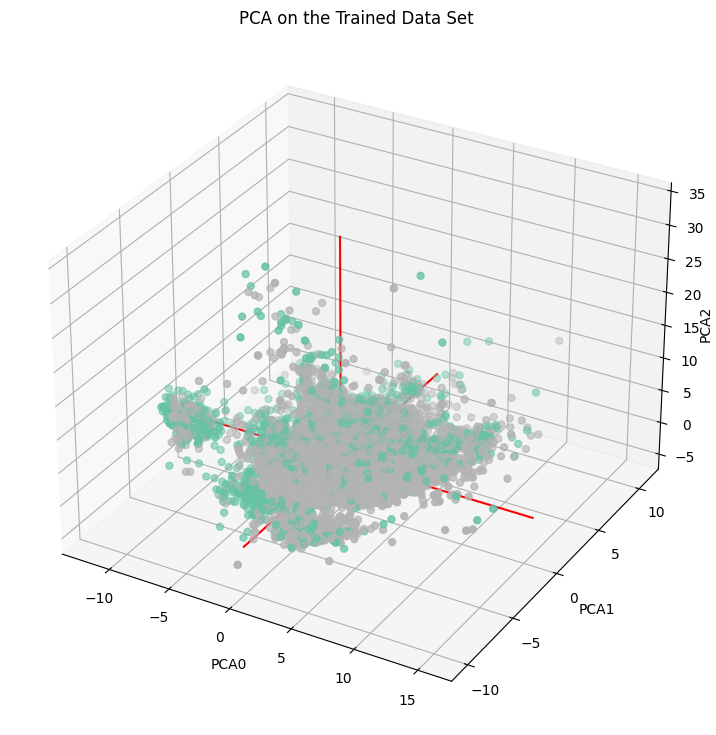

In [ ]:
# Figure to visualize the 3-D data after performing PCA for 3 Dimensions
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y_train, cmap="Set2_r", s=25)
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")
ax.set_zlabel("PCA2", labelpad=-3, rotation=90)
ax.set_title("PCA on the Trained Data Set")
plt.show()

Now here we want to retain 90% of the variance in the original data. The number of components is determined automatically based on the amount of variance that is retained.

In [ ]:
from sklearn.decomposition import PCA
import random
random.seed(0)
pca = PCA(0.9) # We want to lose maximum of 10% information by PCA, will reduce dimensions accordingly. Algorithm should retain enough principal components to explain at least 90% of the variance in the data.
X_train = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance),"- Explained Variance that is Retained")
print("By reducing dimensionality from PCA, ",round((1-sum(explained_variance))*100,2),"% information was lost.")
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
# print(explained_variance)

68 - Explained Variance that is Retained
By reducing dimensionality from PCA,  9.63 % information was lost.


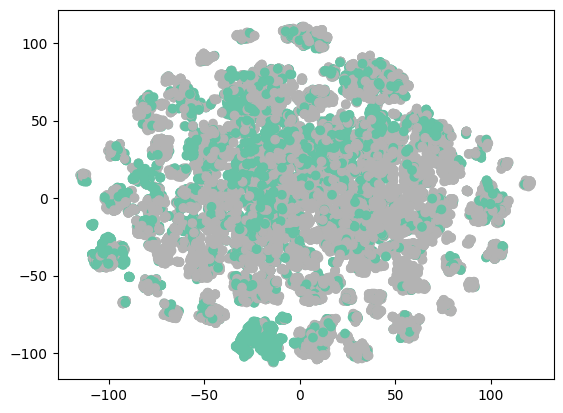

In [ ]:
# WILL NOT USE TSNE. Just for Analysis Purpose. Took around 3 minutes.
# TSNE is mainly to visualize high-dimensional data and identify clusters or patterns
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import random
random.seed(0)

# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)

# Apply t-SNE on the data
X_tsne = tsne.fit_transform(X_train)

# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train[:18000], cmap="Set2_r")
plt.show()

# **Applying Logistic Regression**
Training a logistic regression classifier using the training data **X_train** and **y_train**, and then making predictions on the test data **X_test** using the trained model

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(class_weight='balanced') #Argument class_weight='balanced', which assigns weights to the classes in a way that compensates for Imbalanced class distributions.
clf_lr.fit(X_train,y_train)
#Predictions on the test data X_test using the trained logistic regression classifier and stores the predicted labels in y_pred_lr.
y_pred_lr = clf_lr.predict(X_test)
#print(y_pred_lr)

In [ ]:
print("Confusion Matrix is: \n",confusion_matrix(y_test, y_pred_lr))
print("Accuracy Score is: \n",accuracy_score(y_test, y_pred_lr))

Confusion Matrix is: 
 [[3071  952]
 [ 545 1432]]
Accuracy Score is: 
 0.7505


# **Applying Support Vector Classifier (SVC)**

In [ ]:
#Analysis on this is done to see the performance, which is coming at a cost
#from sklearn.svm import SVC
#clf_svc = SVC(probability=True)
#clf_svc.fit(X_train,y_train)  # This took ~ 2 Minutes
#y_pred_svc=clf_svc.predict(X_test)

In [ ]:
#print(confusion_matrix(y_test, y_pred_svc))
#print(accuracy_score(y_test, y_pred_svc))

# **Using ADABoost Classifier**
Adaboost (Adaptive Boosting) is a popular ensemble learning method that combines several weak learners (usually decision trees) to form a single powerful classifier. The main idea behind Adaboost is to iteratively train a series of weak classifiers on the training data, giving more weight to the misclassified samples at each iteration, until the final model is obtained as a weighted combination of all the weak classifiers.
Adaboost is a boosting algorithm which can be used with any base classifier to improve its performance and in our scenario, it will be used after Logistic Regression as the base classifier to further improve its performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf_abc.fit(X_train, y_train)
y_pred_abc = clf_abc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_abc))
print(confusion_matrix(y_test,y_pred_abc))

0.7746666666666666
[[3512  511]
 [ 841 1136]]


# **Applying XGBoost Classifier with Hyperparameter optimization using Hyperopt**
*   XGBoost (Extreme Gradient Boosting) is a popular gradient boosting algorithm used for supervised learning tasks, such as classification and regression. It is known for its speed, accuracy, and efficiency in handling large datasets.
*   Hyperparameter optimization is the process of finding the best combination of hyperparameters for a machine learning algorithm to achieve the best performance on a given task. Hyperparameters are parameters that are set before training the model and cannot be learned from the data, such as the learning rate, maximum depth of the tree, number of estimators, etc

*   Hyperopt is a popular library used for hyperparameter optimization. It is based on the Bayesian optimization algorithm and can search for the best hyperparameters in a more efficient way compared to grid search or random search.

*   We will be using here: XGBoost classifier with hyperparameter optimization using Hyperopt.

In [ ]:
#Importing Necessary libraries
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

In [ ]:
#Defining the hyperparameter space to search over:
#Hyperparameters and their respective search ranges:
#hp.quniform generates a uniform distribution of integer values from 3 to 18 in steps of 1.
space={'max_depth': hp.quniform("max_depth", 3, 18, 1), #hp.quniform(label, low, high, q) — it rounds the decimal values and returns an integer.
        'gamma': hp.uniform ('gamma', 1,9),             #hp.uniform(label, low, high) — Returns a value uniformly between low and high.
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1), #L1 regularization term on weights. It is a discrete uniform distribution
        'reg_lambda' : hp.uniform('reg_lambda', 0,1), #L2 regularization term on weights. It is a continuous uniform distribution
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1), # The fraction of columns to be randomly subsampled for each tree. It is a continuous uniform distribution
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1), # The minimum sum of instance weight (hessian) needed in a child. It is a discrete uniform distribution
        'n_estimators': 180, # Number of Trees in the Forest
        'seed': 0
    }

In [ ]:
#Function objective takes the dictionary space as its input, which contains hyperparameters for an XGBoost classifier
def objective(space):
    clff=xgb.XGBClassifier( #An instance of the XGBoost classifier 'clff' with the hyperparameters specified in space
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_val, y_val)] #Evaluation dataset using (X_val, y_val) and (X_train, y_train), used to monitor the model's performance during training
    
    clff.fit(X_train, y_train, # fits the classifier to the training data using 'eval_set'
            eval_set=evaluation, eval_metric="auc", #evaluation metric "auc"
            early_stopping_rounds=10,verbose=False)
    

    probs = clff.predict_proba(X_test) #To get predicted probabilities for the test data
    probs = probs[:, 1] #Extracting the probabilities for the positive class

    #Brier score is a proper scoring rule used to evaluate the accuracy of probabilistic predictions. 
    #Calculated as the mean squared difference between predicted probabilities and the actual outcomes 
    #A lower Brier score indicates better prediction accuracy

    loss = brier_score_loss(y_test, probs) #Brier score loss between the true labels y_test and the predicted probabilities probs.
    # accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", loss)
    return {'loss': loss, 'status': STATUS_OK }

The fmin function uses the objective function to iteratively explore the search space and evaluate the performance of different sets of hyperparameters. It returns the set of hyperparameters that achieved the best performance (i.e., lowest loss) on the test data, as determined by the objective function. The trials object keeps track of the performance of different hyperparameters during the search.

In [ ]:
#Using fmin function to find the best hyperparameters for the XGBClassifier model
trials = Trials()
best_hyperparams = fmin(fn = objective, #Specifies the function to optimize, which is the objective function
                        space = space, #Dictionary specifying the search space for the hyperparameters.
                        algo = tpe.suggest, # search algorithm - Tree-structured Parzen Estimator (TPE) algorithm
                        max_evals = 10, #maximum number of evaluations
                        trials = trials)
#The "SCORE" lines represent the scores (i.e., loss or error) achieved by the algorithm on each trial. 
#These scores are likely computed on a validation set, and are used to evaluate the performance of the model being optimized.

SCORE:
0.17385624428192387
SCORE:
0.19446200222021015
SCORE:
0.19375035929119155
SCORE:
0.18016341974105946
SCORE:
0.17412212135551347
SCORE:
0.17829622677379378
SCORE:
0.174467251381249
SCORE:
0.17000730392831478
SCORE:
0.18163957661524155
SCORE:
0.17709304695943495
100%|██████████| 10/10 [00:08<00:00,  1.14trial/s, best loss: 0.17000730392831478]


In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7939669360747952, 'gamma': 4.896398646011575, 'max_depth': 15.0, 'min_child_weight': 2.0, 'reg_alpha': 48.0, 'reg_lambda': 0.39988625641754083}


In [ ]:
#Using the best hyperparameters obtained using Bayesian optimization to train a XGBClassifier model on the training data X_train and y_train
#Best Hyperparameters are stored in best_hyperparams
#Instance of the XGBoost classifier, where the hyperparameters are set to the best values found during the hyperparameter tuning process (stored in the dictionary best_hyperparams).
clf_xgb=xgb.XGBClassifier(colsample_bytree=best_hyperparams['colsample_bytree'],gamma=best_hyperparams['gamma'],max_depth=int(best_hyperparams['max_depth']),min_child_weight=int(best_hyperparams['min_child_weight']),reg_alpha=int(best_hyperparams['reg_alpha']),reg_lambda=best_hyperparams['reg_lambda'], base_score=0.5)
clf_xgb.fit(X_train,y_train)
y_pred_xgb = clf_xgb.predict(X_test)

Accuracy Score is:  81.97 %


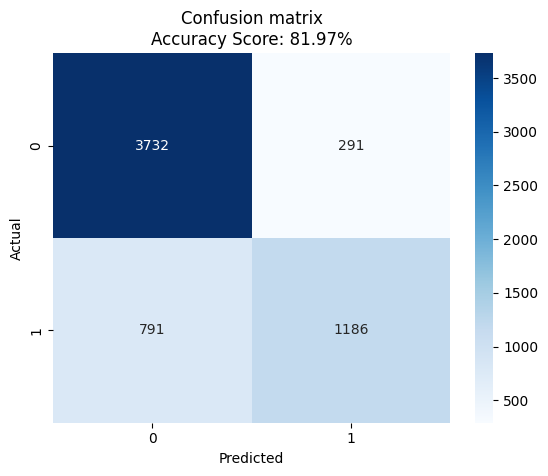

In [ ]:
#Evaluating the accuracy of the Model using Accuracy Score and Confusion Matrix

acc_score = round(accuracy_score(y_test, y_pred_xgb)*100,2)
print("Accuracy Score is: ", acc_score, "%")

import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set plot title with accuracy score
plt.title('Confusion matrix\nAccuracy Score: {}%'.format(acc_score))
plt.show()

# **Evaluating the Performance of the Model**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import brier_score_loss
import numpy.ma as ma
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import auc, roc_curve
from scipy import integrate
from sklearn.neighbors import KernelDensity

Function called plot_calibration_curve which takes in several input parameters: bcc, y_true, y_pred, name, min_samples, and axis.

Checks if the axis input parameter is None, and if so, creates a new figure and subplot with a default size of 5x5 and assigns it to axis.

The function first sets the title and axes labels for a plot, and plots a diagonal line from (0,0) to (100,100) to represent perfect calibration. It also sets the x and y axis limits to (0, 100), and specifies major and minor tick locators to show ticks at intervals of 20 and 10, respectively.

This line turns on the grid lines for both major and minor ticks.

The function then extracts the predicted probabilities, predicted positive percentages, and number of samples used from the bcc input parameter.

If the min_samples input parameter is specified, the function masks out any bins with fewer than min_samples samples and plots the remaining data in light blue. It then plots the calibration curve using the remaining data in dark blue, along with a legend that displays the area between the curve and the diagonal, and the maximum deviation between the predicted and actual positive percentages.

The function then plots a histogram of y_pred on a secondary y-axis and returns the axis.

In [ ]:
# The function first sets the title and axes labels for the plot, and plots a diagonal line to represent perfect calibration
def plot_calibration_curve(bcc,y_true,y_pred,name='Calibration curve',min_samples=None,axis=None):
    if axis is None:
        axis = plt.figure(figsize=(5, 5)).add_subplot(111)
    axis.set_title(name)
    # plots a diagonal line from (0,0) to (100,100) to represent perfect calibration
    axis.plot([0, 100], [0, 100], ls='--', lw=1, color='grey')
    axis.set_xlabel('Predicted probability')
    axis.set_ylabel('True probability in each bin')
    # Set the x and y axis limits to (0, 100), and specify major and minor tick locators to show ticks at intervals of 20 and 10, respectively
    axis.set_xlim((0, 100))
    axis.xaxis.set_major_locator(MultipleLocator(20))
    axis.xaxis.set_minor_locator(MultipleLocator(10))
    axis.set_ylim((0, 100))
    axis.yaxis.set_major_locator(MultipleLocator(20))
    axis.yaxis.set_minor_locator(MultipleLocator(10))

    # axis.set_aspect(1)
    # Turns on the grid lines for both major and minor ticks
    axis.grid(which='both')
    # Extracts the predicted probabilities, predicted positive percentages, and number of samples used from the bcc input parameter
    sample_probabilities = bcc[0]
    predicted_pos_percents = bcc[1]
    num_plays_used = bcc[2]

# If min_samples is specified, it masks out any bins with fewer than min_samples samples and plots the remaining data in light blue. 
# It then plots the calibration curve using the remaining data in dark blue, along with a legend that displays the area between the curve and the diagonal, 
# and the maximum deviation between the predicted and actual positive percentages.
    
    if min_samples is not None:
        axis.plot(sample_probabilities,predicted_pos_percents,c='c',alpha=0.3) # Plotting sample_probabilities on the x-axis and predicted_pos_percents on the y-axis
        sample_probabilities = ma.array(sample_probabilities)
        sample_probabilities[num_plays_used < min_samples] = ma.masked
        predicted_pos_percents = ma.array(predicted_pos_percents)
        predicted_pos_percents[num_plays_used < min_samples] = ma.masked

    max_deviation = bcc[3]
    residual_area = bcc[4]

    axis.plot(sample_probabilities,predicted_pos_percents,c='c',label='Calibration curve\n(area = %0.2f, max dev = %0.2f)'% (residual_area, max_deviation))
    axis.legend(loc='lower right')

    ax2 = axis.twinx()
    ax2.hist(y_pred * 100,bins=np.arange(0, 101, 1),density=True,alpha=0.4,facecolor='grey')
    ax2.set_ylim([0, 0.2])
    ax2.set_yticks([0, 0.1, 0.2])
    plt.tight_layout()
    return axis

Below code creates a Receiver Operating Characteristic (ROC) curve for binary classification models.

The function takes three inputs: y_true and y_prob, which are arrays of true binary labels and the predicted probabilities of the positive class, respectively, and name, which is an optional string parameter that specifies the title of the plot.

The function first calculates the false positive rate (fpr) and true positive rate (tpr) using the roc_curve function from scikit-learn library. The third output value is ignored.

The function then calculates the area under the ROC curve (roc_auc) using the auc function from the same library.

If the axis parameter is not specified, a new Figure object with a single subplot is created and assigned to axis.

The ROC curve is then plotted using the plot method of the axis object with fpr on the x-axis and tpr on the y-axis. The linewidth parameter is set to 1, and the label is set to 'ROC curve (area = %0.2f)' % roc_auc.

A reference line is plotted using axis.plot([0, 1], [0, 1], linestyle='--', color='gray'), which is a diagonal line from the bottom left corner to the top right corner.

The x and y limits and tick locators are set using axis.set_xlim, axis.xaxis.set_major_locator, axis.xaxis.set_minor_locator, axis.set_ylim, and axis.yaxis.set_major_locator, axis.yaxis.set_minor_locator.

Grid lines are turned on using axis.grid(which='both').
Legends are added using plt.gca().legend() and axis.legend(loc='lower right').

Finally, plt.tight_layout() is called to adjust the spacing of the plot elements. 
The axis object is returned at the end of the function.

In [ ]:
def plot_roc_curve(y_true, y_prob, name='Calibration curve', axis=None):

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    if axis is None:
        axis = plt.figure(figsize=(5, 5)).add_subplot(111)

    axis.plot(fpr, tpr, linewidth=1, label='ROC curve (area = %0.2f)' % roc_auc)

    # reference line, legends, and axis labels
    axis.plot([0, 1], [0, 1], linestyle='--', color='gray')
    axis.set_title('ROC curve')
    axis.set_xlabel('False Positive Rate')
    axis.set_ylabel('True Positive Rate')
    axis.set_xlim(0, 1)
    axis.xaxis.set_major_locator(MultipleLocator(0.20))
    axis.xaxis.set_minor_locator(MultipleLocator(0.10))
    axis.set_ylim(0, 1)
    axis.yaxis.set_major_locator(MultipleLocator(0.20))
    axis.yaxis.set_minor_locator(MultipleLocator(0.10))
    axis.grid(which='both')
    plt.gca().legend()
    axis.legend(loc='lower right')
    plt.tight_layout()

# **Results**

In [ ]:
#!pip install scikit-learn==1.0.1
#!pip install scikit-learn==0.22
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_test, y_pred (prob), y_score(Predicted Label)
# y_pred = clf.predict_proba(X_test)
# y_score = clf.predict(X_test)
# model = Trained Model like clf =  LogisticRegression.fit()
# X_test
def run(model,X_test,y_test):
    y_test = np.array(y_test,dtype=bool)
    y_pred = model.predict_proba(X_test)
    y_score = model.predict(X_test)
    
    y_pred = y_pred[:,1] 
    print(y_pred)
    y_pred_bin = np.where(np.array(y_pred) > 0.5, 1, 0)
    
    #Accuracy
    acc = accuracy_score(y_test, y_score)
    cm = confusion_matrix(y_test, y_pred_bin)
  
    print("Confusion Matrix")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    # Confusion Matrix
    #plot_confusion_matrix(model, X_test, y_test)  
    plt.show() 
    
    #PR Graph
    prec, recall, _ = precision_recall_curve(y_test, y_score)
    # pr_display = PrecisionRecallDisplay(precision=prec, recall=recall,average_precision=None, estimator_name=None,clas)    
    # Calibration Curve
    n_bins = 100
    bandwidth = 1 / n_bins

    #Kernel Density Estimation
    kde_pos = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit((y_pred[y_test])[:, np.newaxis])
    kde_total = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(y_pred[:, np.newaxis])
    sample_probabilities = np.linspace(0.01, 0.99, 99)
    # Finding Probability and scaling
    number_density_offense_won = np.exp(kde_pos.score_samples(sample_probabilities[:, np.newaxis])) * np.sum((y_test))
    number_density_total = np.exp(kde_total.score_samples(sample_probabilities[:, np.newaxis])) * len(y_test)
    # Count of Each Bucket
    number_pos = (number_density_offense_won* np.sum(y_test)/ np.sum(number_density_offense_won))
    number_total = (number_density_total * len(y_test) / np.sum(number_density_total))
    # Fraction of goals scored from attempts in each bucket
    predicted_pos_percents = np.nan_to_num(number_pos / number_total, 1)
    #Scaling to 100
    sample_probabilities = 100.0 * sample_probabilities
    predicted_goal_percents = 100.0 * predicted_pos_percents
    num_shots_used = number_total
    # Calculating Deviation and Residual Area
    max_deviation = np.max(np.abs(predicted_goal_percents - sample_probabilities))
    residual_area = integrate.trapz(np.abs(predicted_goal_percents - sample_probabilities),sample_probabilities)
    
    # ROC and Brier
    roc = roc_auc_score(y_test, y_pred)
    brier = brier_score_loss(y_test, y_pred)

    # Gather Everything
    gather = [sample_probabilities,predicted_goal_percents,num_shots_used,max_deviation,residual_area,roc,brier]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plot_roc_curve(y_test,y_pred, axis=ax[0])
    plot_calibration_curve(gather,y_test,y_pred,min_samples=100,axis=ax[1],)
    ax[2].grid(which='both')
    ax[2].set_title("Precision-Recall Graph")
    # pr_display.plot(ax=ax[2])
    ax[2].plot(recall,prec)
    print("Accuracy",acc)
    print("AUROC",roc)
    print("Brier Score",brier)
    print("Area of Residual Graph",residual_area)
    print("Maximum Deviation", max_deviation)

In [ ]:
import matplotlib.pyplot as plt
#from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

 

1.  The deviation and residual area are part of the calibration curve. They are used to evaluate the calibration performance of a binary classification model.
2.  The calibration curve is a graph that shows the agreement between the predicted probabilities and the actual outcomes. 
The deviation measures the maximum difference between the predicted and actual probabilities.
3.  The residual area measures the area between the calibration curve and the diagonal line, which represents perfect calibration.

[0.37906511 0.35652152 0.44086313 ... 0.19250288 0.6270327  0.25796294]
Confusion Matrix


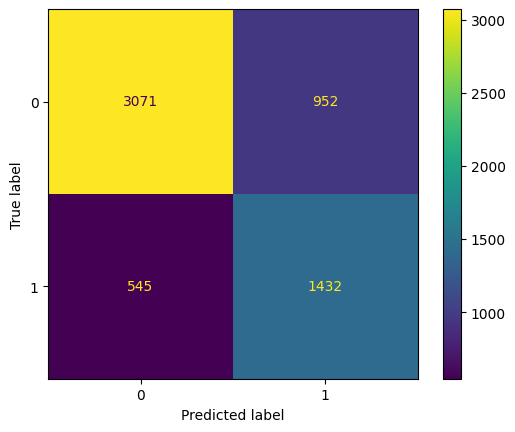

Accuracy 0.7505
AUROC 0.816737120183125
Brier Score 0.1751271307121264
Area of Residual Graph 1150.5078926739427
Maximum Deviation 20.924391831050144


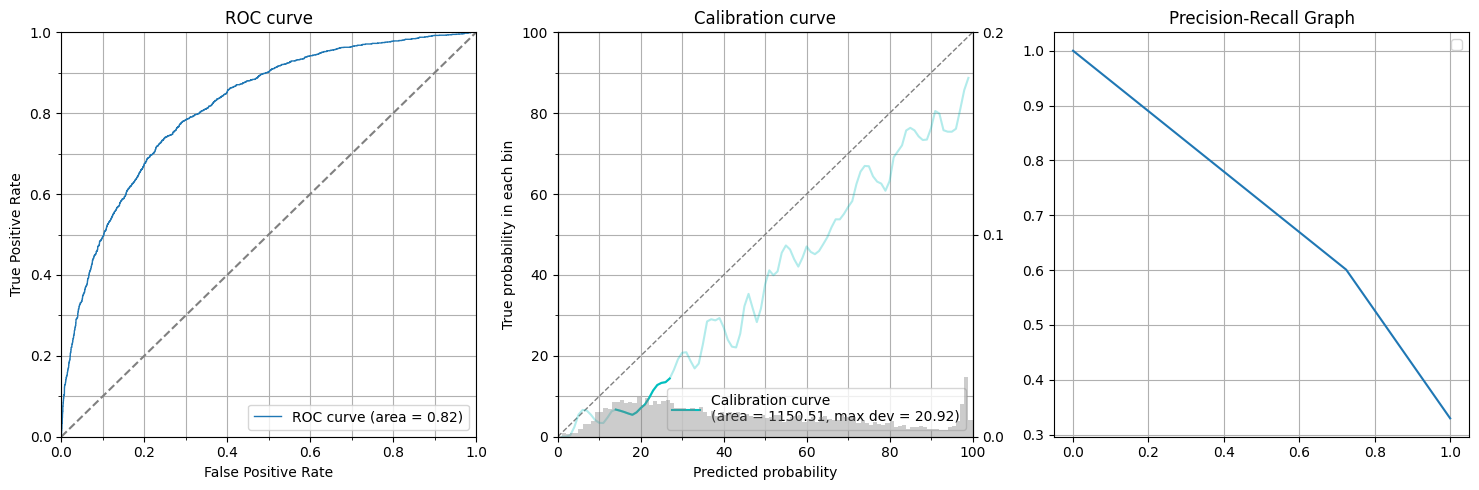

In [ ]:
run(clf_lr,X_test,y_test) # Logistic regression

[0.49122387 0.49810651 0.49302715 ... 0.49394847 0.49784413 0.49092578]
Confusion Matrix


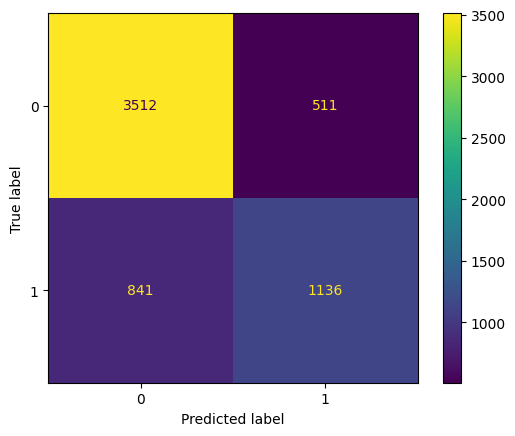

Accuracy 0.7746666666666666
AUROC 0.8167486874598523
Brier Score 0.24430932907083047
Area of Residual Graph 2957.7168606691034
Maximum Deviation 99.0


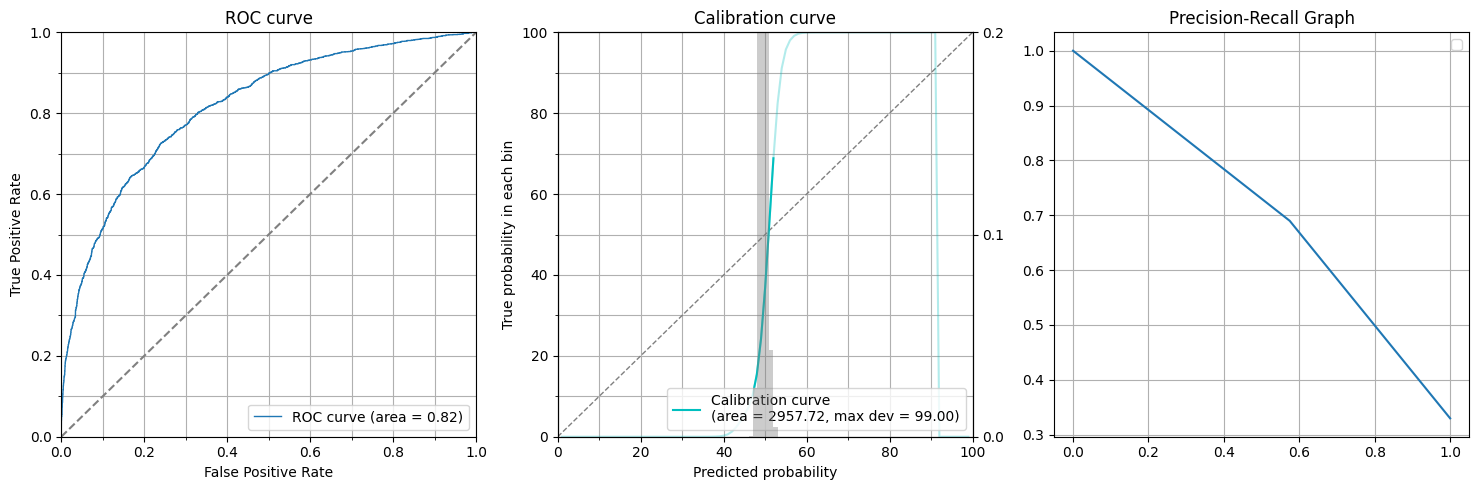

In [ ]:
run(clf_abc,X_test,y_test) # ADA Boost Classifier

[0.11939678 0.23344794 0.28573164 ... 0.16893066 0.372867   0.15705778]
Confusion Matrix


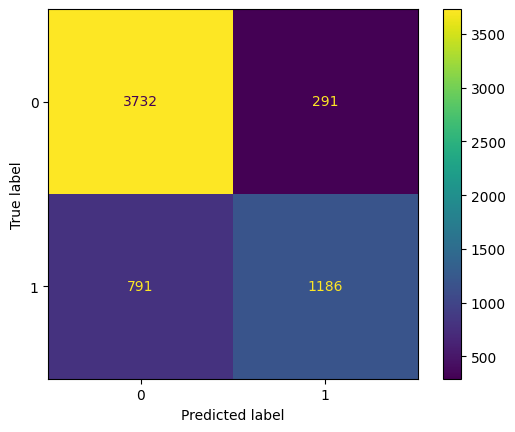

Accuracy 0.8196666666666667
AUROC 0.8627216972313095
Brier Score 0.13210854019786056
Area of Residual Graph 415.32567978134085
Maximum Deviation 16.792657277843915


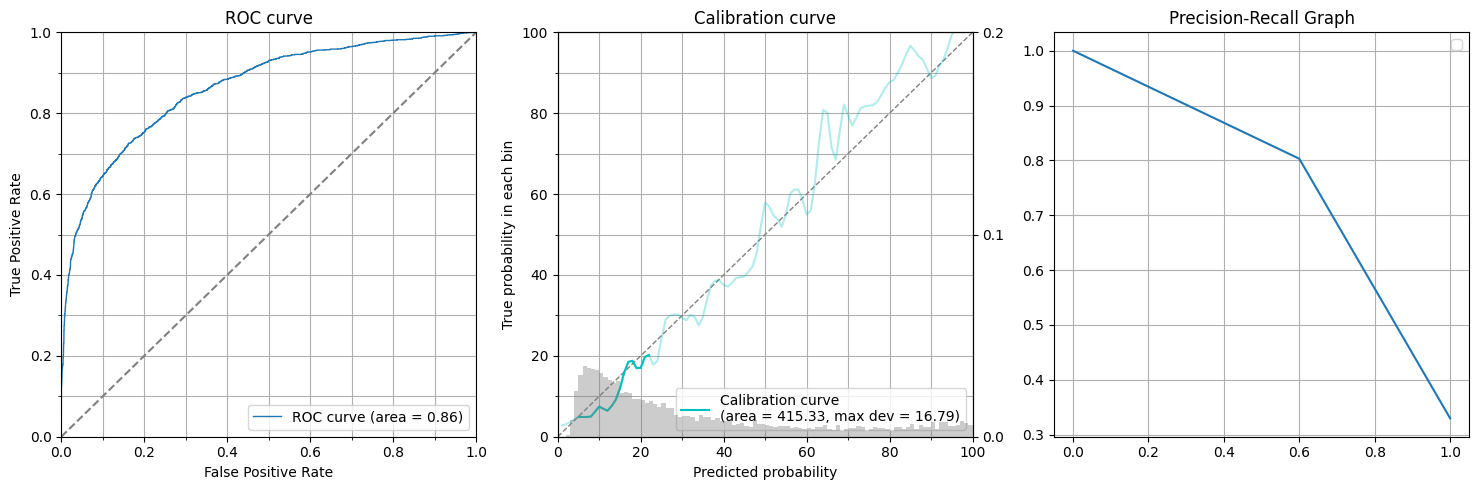

In [ ]:
run(clf_xgb,X_test,y_test)

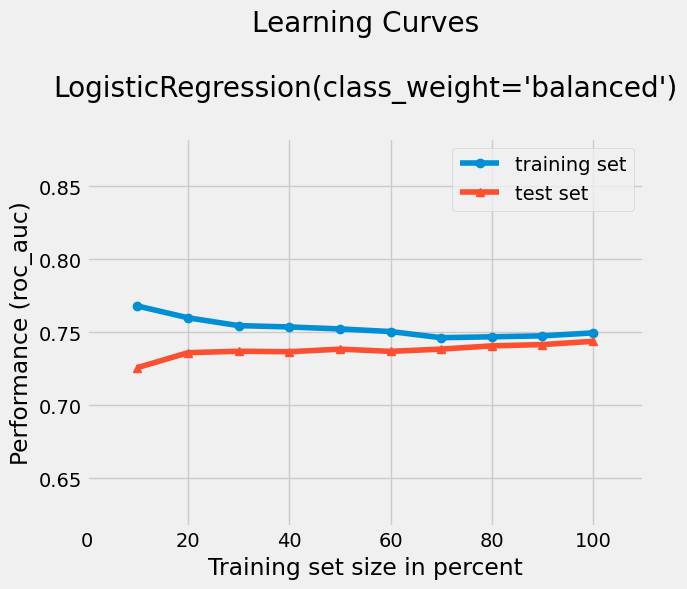

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf_lr,scoring="roc_auc") #{'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}
plt.show()

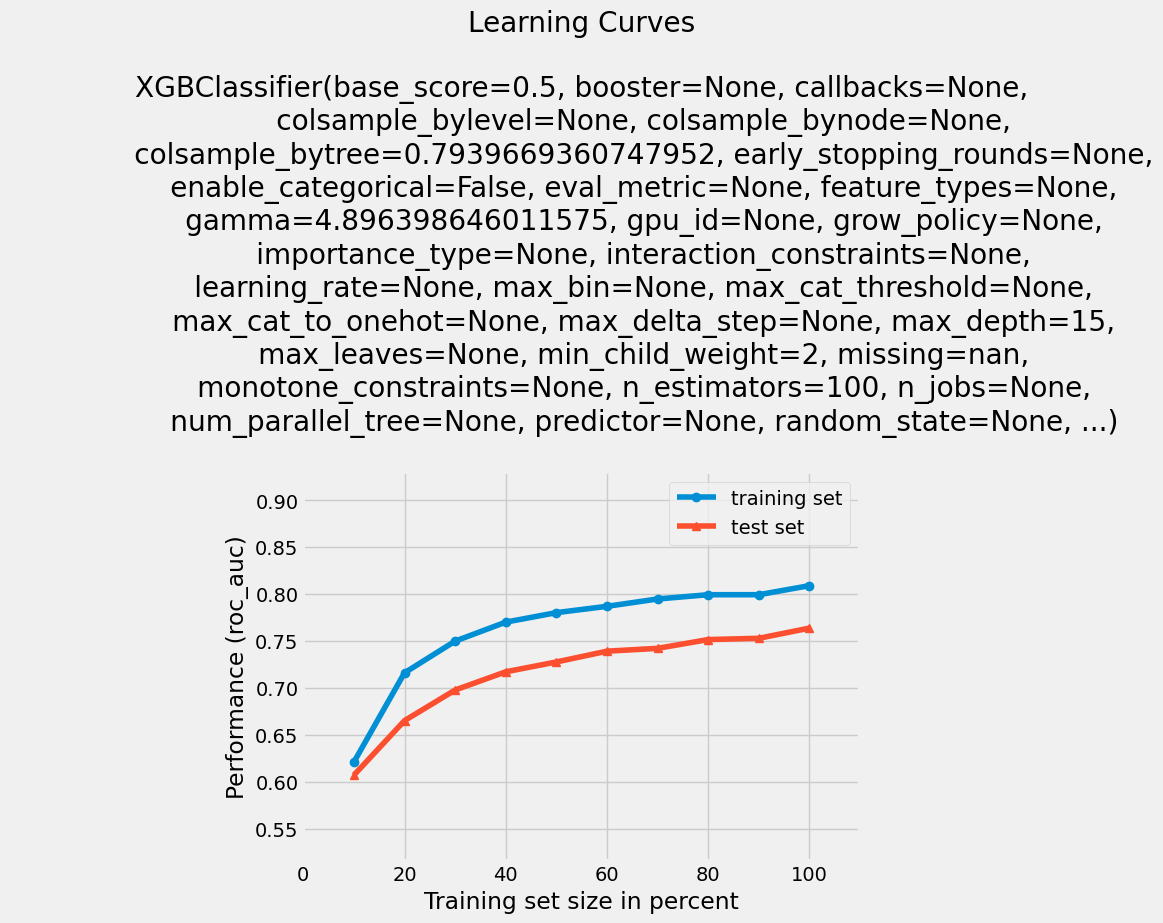

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf_xgb,scoring="roc_auc") #{'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}
plt.show()

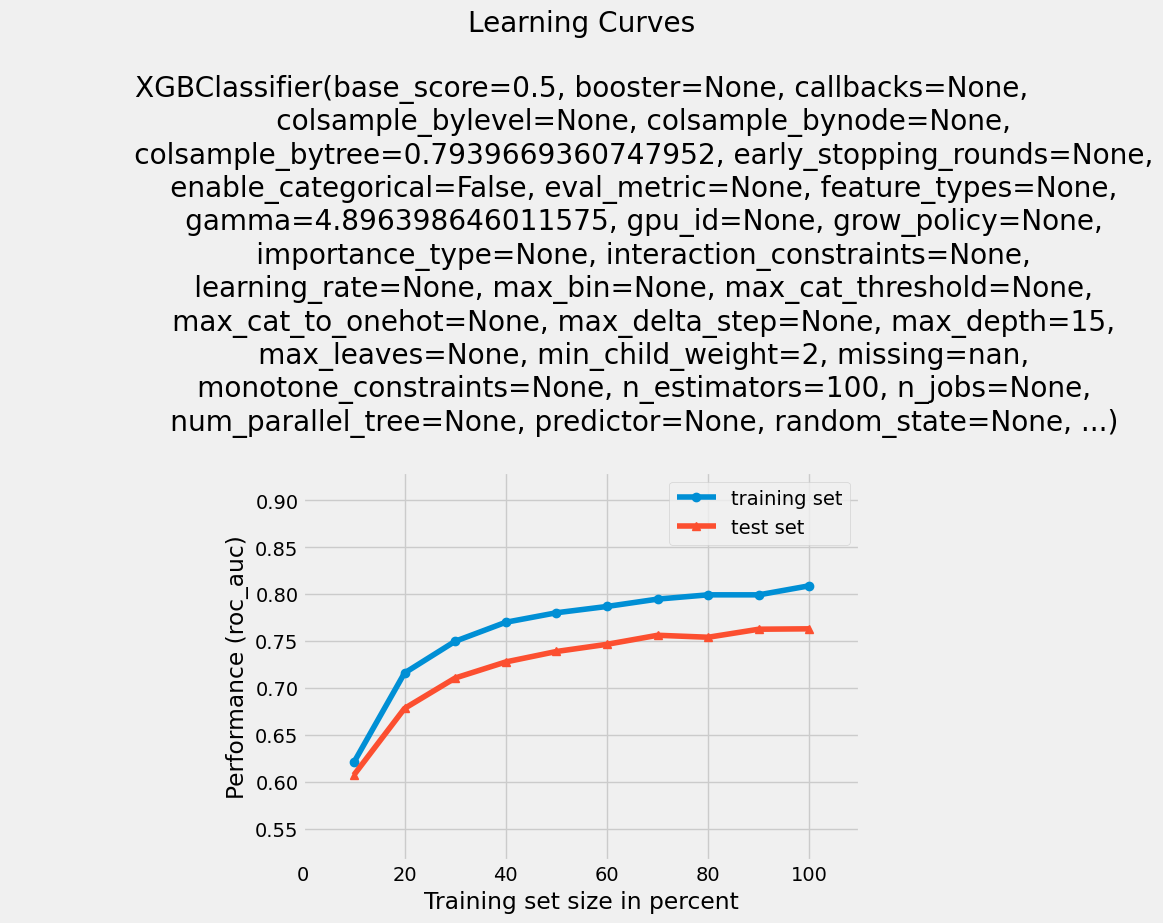

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_val, y_val, clf_xgb,scoring="roc_auc") #{'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}
plt.show()